In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
data.drop(['Channel','Region'],axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


### 一

In [ ]:
def read_csv_2(data_file):
  data = pd.read_csv(data_file).drop(['Channel','Region'],axis=1)
  return data

In [ ]:
data_file = '/content/drive/MyDrive/ColabNotebooks/homework/data/wholesale_customers.csv'
data = read_csv_2(data_file)
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


### 二

In [ ]:
def summary_statistics(df):
  rows = ['mean','std','min','max']
  stat_data = df.describe().loc[rows,:].astype(int)
  res = pd.DataFrame(stat_data.values.T, index=stat_data.columns, columns=stat_data.index)
  return res

In [ ]:
print(summary_statistics(data))

                   mean    std  min     max
Fresh             12000  12647    3  112151
Milk               5796   7380   55   73498
Grocery            7951   9503    3   92780
Frozen             3071   4854   25   60869
Detergents_Paper   2881   4767    3   40827
Delicassen         1524   2820    3   47943


### 三

In [ ]:
def standardize(df):
  sta_data = df.apply(lambda x: (x - x.mean()) / x.std())
  return sta_data

### 四

In [ ]:
# Given a dataframe df and a number of clusters k, return a pandas series y
# specifying an assignment of instances to clusters, using kmeans.
# y should contain values in the set {0,1,...,k-1}.
def kmeans(df, k):
  from sklearn.cluster import KMeans
  X_train = df.values
  kmeans = KMeans(n_clusters=k, init= 'random').fit(X_train)
  y = pd.DataFrame(kmeans.labels_)
  return y

### 五

In [ ]:
def kmeans_plus(df, k):
  from sklearn.cluster import KMeans
  X_train = df.values
  kmeans = KMeans(n_clusters=k, init= 'k-means++').fit(X_train)
  y = pd.DataFrame(kmeans.labels_)
  return y

### 六

In [ ]:
def agglomerative(df, k):
  from sklearn.cluster import AgglomerativeClustering
  X_train = df.values
  clustering = AgglomerativeClustering().fit(X_train)
  y = pd.DataFrame(clustering.labels_)
  return y

### 七

In [ ]:
def clustering_score(X,y):
  from sklearn.metrics import silhouette_score
  score = silhouette_score(X,y,metric="euclidean",sample_size=300)
  return score

### 八

In [ ]:
# Perform the cluster evaluation described in the coursework description.
# Given the dataframe df with the data to be clustered,
# return a pandas dataframe with an entry for each clustering algorithm execution.
# Each entry should contain the: 
# 'Algorithm' name: either 'Kmeans' or 'Agglomerative', 
# 'data' type: either 'Original' or 'Standardized',
# 'k': the number of clusters produced,
# 'Silhouette Score': for evaluating the resulting set of clusters.
def cluster_evaluation(df):
  Algorithms = ['Kmeans', 'Agglomerative']
  results = []
  orig_data = df
  stan_data = standardize(df) #Standardized data
  for algorithm in Algorithms:
    orig_res = [algorithm, 'Original']
    stan_res = [algorithm, 'Standardized']
    for k in [3,5,10]:#there we can set the value of k
      orig_res.append(k)
      stan_res.append(k)
      if algorithm in ['Kmeans']:
        # there we use kmeans_plus,it better than kmeans
        score_orig = clustering_score(orig_data, kmeans_plus(orig_data,k))
        score_stan = clustering_score(stan_data, kmeans_plus(stan_data,k))
      else:
        score_orig = clustering_score(orig_data, agglomerative(orig_data,k))
        score_stan = clustering_score(stan_data, agglomerative(stan_data,k))
      orig_res.append(score_orig)
      stan_res.append(score_stan)

      results.append(orig_res)  
      results.append(stan_res)

      orig_res = orig_res[:-2]
      stan_res = stan_res[:-2]
  d_results = pd.DataFrame(results,columns=['Algorithm', 'data', 'k', 'Silhouette Score'])
  return d_results


### 九

In [ ]:
def best_clustering_score(rdf):
  best_entry = rdf.sort_values('Silhouette Score').iloc[-1,:]
  return best_entry['Silhouette Score']

### 十

In [ ]:
import matplotlib.pyplot as plt
def scatter_plots(df):
  stan_data = standardize(df) #Standardized data
  y = agglomerative(stan_data, k=3)
  n = df.shape[1] #get nums of attributes
  names = df.columns #get names of columns
  count = 0
  for i in range(n):
    for j in range(i+1,n):
      count += 1
      print(count)
      fig = plt.figure(figsize=(15,15))
      ax = fig.add_subplot()
      ax = plt.subplot(3,5,count)
      ax.scatter(stan_data.iloc[:,i],stan_data.iloc[:,j],c=y)
      ax.set_xlabel(names[i])
      ax.set_ylabel(names[j])
      plt.show()




In [ ]:
data_file = "/content/drive/MyDrive/ColabNotebooks/homework/data/wholesale_customers.csv"
data = read_csv_2(data_file)
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


1


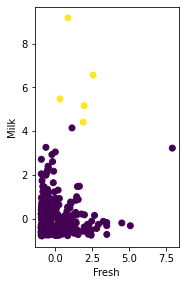

2


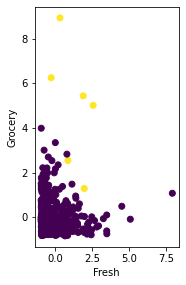

3


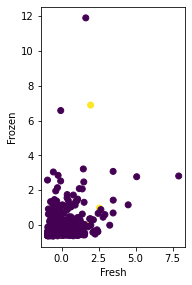

4


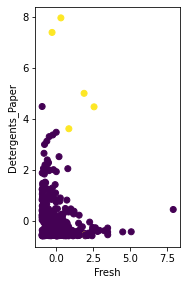

5


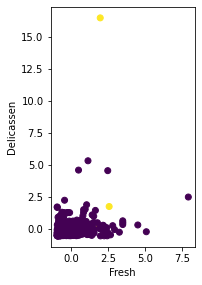

6


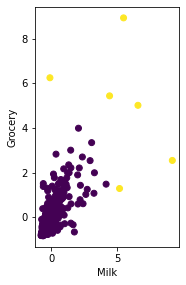

7


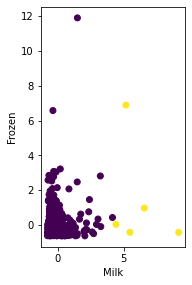

8


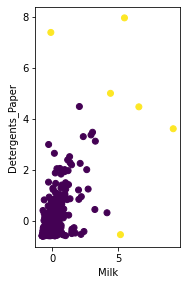

9


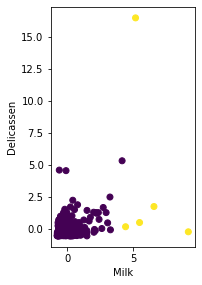

10


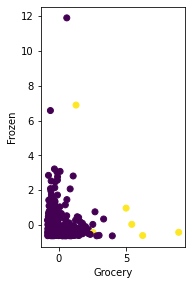

11


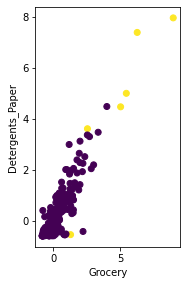

12


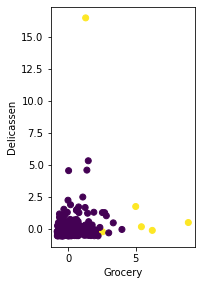

13


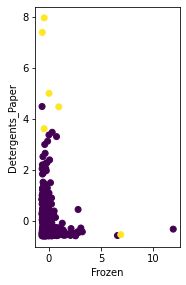

14


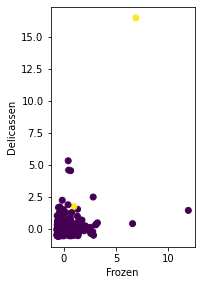

15


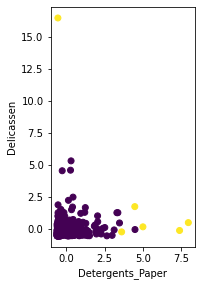

In [ ]:
scatter_plots(data)

In [ ]:
stat_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870


In [ ]:
kmeans_plus(data, 3)

,0
0,0
1,0
2,0
3,0
4,1
...,...
435,1
436,1
437,2
438,0


In [ ]:
from sklearn import metrics
metrics.silhouette_score(data,kmeans_plus(data, 6),metric="euclidean",sample_size=300,)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3928955118878078

In [ ]:
type(kmeans.labels_)

numpy.ndarray

In [ ]:
# Part 2: Cluster Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# Return a pandas dataframe containing the data set that needs to be extracted from the data_file.
# data_file will be populated with the string 'wholesale_customers.csv'.
def read_csv_2(data_file):
  data = pd.read_csv(data_file).drop(['Channel','Region'],axis=1)
  return data
# Return a pandas dataframe with summary statistics of the data.
# Namely, 'mean', 'std' (standard deviation), 'min', and 'max' for each attribute.
# These strings index the new dataframe columns. 
# Each row should correspond to an attribute in the original data and be indexed with the attribute name.
def summary_statistics(df):
  rows = ['mean','std','min','max']
  stat_data = df.describe().loc[rows,:].astype(int)
  res = pd.DataFrame(stat_data.values.T, index=stat_data.columns, columns=stat_data.index)
  return res

# Given a dataframe df with numeric values, return a dataframe (new copy)
# where each attribute value is subtracted by the mean and then divided by the
# standard deviation for that attribute.
def standardize(df):
  sta_data = df.apply(lambda x: (x - x.mean()) / x.std())
  return sta_data

# Given a dataframe df and a number of clusters k, return a pandas series y
# specifying an assignment of instances to clusters, using kmeans.
# y should contain values in the set {0,1,...,k-1}.
def kmeans(df, k):
  X_train = df.values
  kmeans = KMeans(n_clusters=k, init= 'random').fit(X_train)
  y = pd.DataFrame(kmeans.labels_)
  return y

# Given a dataframe df and a number of clusters k, return a pandas series y
# specifying an assignment of instances to clusters, using kmeans++.
# y should contain values from the set {0,1,...,k-1}.
def kmeans_plus(df, k):
  X_train = df.values
  kmeans = KMeans(n_clusters=k, init= 'k-means++').fit(X_train)
  y = pd.DataFrame(kmeans.labels_)
  return y

# Given a dataframe df and a number of clusters k, return a pandas series y
# specifying an assignment of instances to clusters, using agglomerative hierarchical clustering.
# y should contain values from the set {0,1,...,k-1}.
def agglomerative(df, k):
  X_train = df.values
  clustering = AgglomerativeClustering().fit(X_train)
  y = pd.DataFrame(clustering.labels_)
  return y

# Given a data set X and an assignment to clusters y
# return the Solhouette score of the clustering.
def clustering_score(X,y):
  score = silhouette_score(X,y,metric="euclidean",sample_size=300)
  return score

# Perform the cluster evaluation described in the coursework description.
# Given the dataframe df with the data to be clustered,
# return a pandas dataframe with an entry for each clustering algorithm execution.
# Each entry should contain the: 
# 'Algorithm' name: either 'Kmeans' or 'Agglomerative', 
# 'data' type: either 'Original' or 'Standardized',
# 'k': the number of clusters produced,
# 'Silhouette Score': for evaluating the resulting set of clusters.
def cluster_evaluation(df):
  Algorithms = ['Kmeans', 'Agglomerative']
  results = []
  orig_data = df
  stan_data = standardize(df) #Standardized data
  for algorithm in Algorithms:
    orig_res = [algorithm, 'Original']
    stan_res = [algorithm, 'Standardized']
    for k in [3,5,10]:#there we can set the value of k
      orig_res.append(k)
      stan_res.append(k)
      if algorithm in ['Kmeans']:
        # there we use kmeans_plus,it better than kmeans
        score_orig = clustering_score(orig_data, kmeans_plus(orig_data,k))
        score_stan = clustering_score(stan_data, kmeans_plus(stan_data,k))
      else:
        score_orig = clustering_score(orig_data, agglomerative(orig_data,k))
        score_stan = clustering_score(stan_data, agglomerative(stan_data,k))
      orig_res.append(score_orig)
      stan_res.append(score_stan)

      results.append(orig_res)  
      results.append(stan_res)

      orig_res = orig_res[:-2]
      stan_res = stan_res[:-2]
  d_results = pd.DataFrame(results,columns=['Algorithm', 'data', 'k', 'Silhouette Score'])
  return d_results

# Given the performance evaluation dataframe produced by the cluster_evaluation function,
# return the best computed Silhouette score.
def best_clustering_score(rdf):
  best_entry = rdf.sort_values('Silhouette Score').iloc[-1,:]
  return best_entry['Silhouette Score']


# Run some clustering algorithm of your choice with k=3 and generate a scatter plot for each pair of attributes.
# Data points in different clusters should appear with different colors.
def scatter_plots(df):
  stan_data = standardize(df) #Standardized data
  y = agglomerative(stan_data, k=3)
  n = df.shape[1] #get nums of attributes
  names = df.columns #get names of columns
  count = 0
  for i in range(n):
    for j in range(i+1,n):
      count += 1
      #print(count)
      fig = plt.figure(figsize=(15,15))
      ax = fig.add_subplot()
      ax = plt.subplot(3,5,count)
      ax.scatter(stan_data.iloc[:,i],stan_data.iloc[:,j],c=y)
      ax.set_xlabel(names[i])
      ax.set_ylabel(names[j])
      plt.show()

# 1
df = read_csv_2('/content/drive/MyDrive/ColabNotebooks/homework/data/wholesale_customers.csv')
# 2
print(summary_statistics(df))
# 3
print(standardize(df))
# 4
k = 3
print(kmeans(df, k))
# 5
print(kmeans_plus(df, k))
# 6
print(agglomerative(df, k))
# 7
X = df.values
y = agglomerative(df, k)
print(clustering_score(X,y))
# 8
print(cluster_evaluation(df))
# 9
rdf = cluster_evaluation(df)
print(best_clustering_score(rdf))
# 10
scatter_plots(df)